# Dataset CIFAR-10

In [3]:
import urllib.request
import tarfile

In [4]:
url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
urllib.request.urlretrieve(url, "cifar-10-python.tar.gz")

with tarfile.open("cifar-10-python.tar.gz", "r:gz") as tar:
    tar.extractall(path=".")

#MUESTREO DEL DATASET

In [5]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
import cv2

In [6]:
(x_train, y_train), _ = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

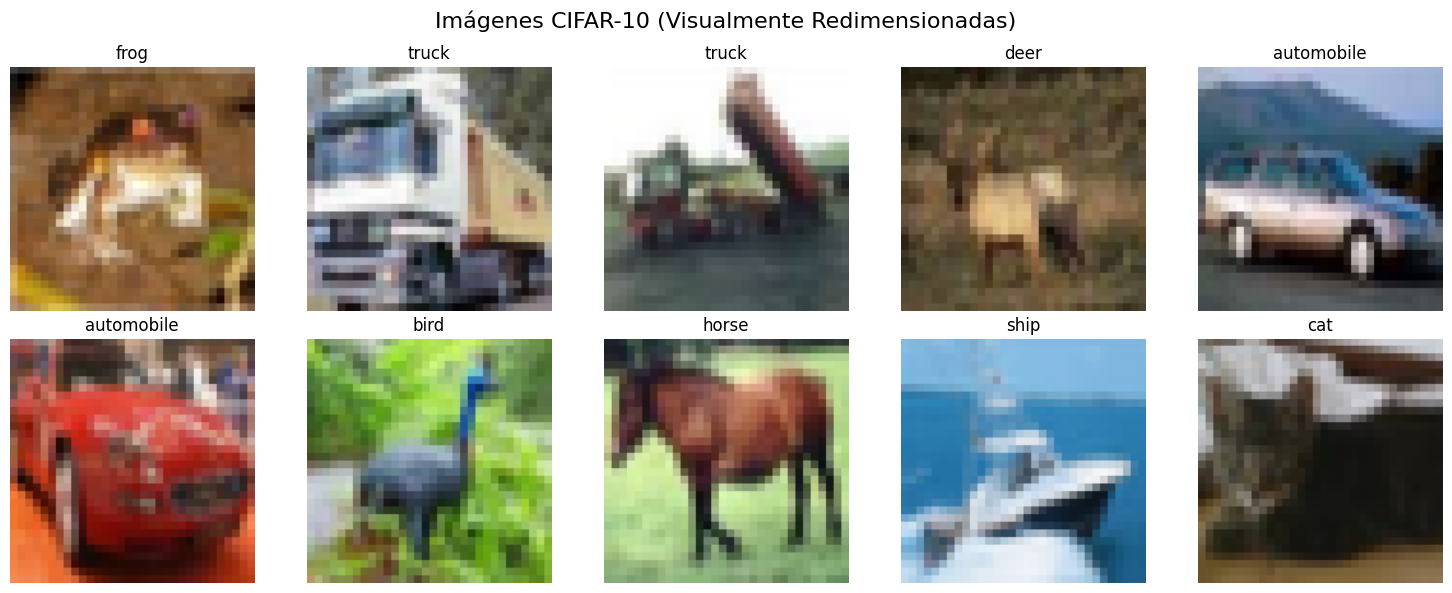

In [8]:
plt.figure(figsize=(15, 6))
for i in range(10):
    img = cv2.resize(x_train[i], (128, 128), interpolation=cv2.INTER_NEAREST)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(class_names[y_train[i][0]], fontsize=12)
    plt.axis('off')
plt.suptitle("Imágenes CIFAR-10 (Visualmente Redimensionadas)", fontsize=16)
plt.tight_layout()
plt.show()

# INTEGRACION

In [9]:
import os, urllib.request, tarfile
import numpy as np
from tensorflow.keras.utils import to_categorical
import pickle
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [10]:
if not os.path.exists("cifar-10-batches-py"):
    urllib.request.urlretrieve(
        "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz",
        "cifar-10-python.tar.gz"
    )
    with tarfile.open("cifar-10-python.tar.gz", "r:gz") as tar:
        tar.extractall()

In [11]:
def load_batch(file):
    with open(file, 'rb') as f:
        d = pickle.load(f, encoding='latin1')
        return d['data'], d['labels']

x_list, y_list = [], []
for i in range(1,6):
    data, labels = load_batch(f"cifar-10-batches-py/data_batch_{i}")
    x_list.append(data)
    y_list.append(labels)
x_train = np.concatenate(x_list).reshape(-1,3,32,32).transpose(0,2,3,1)
y_train = np.concatenate(y_list)
x_test, y_test = load_batch("cifar-10-batches-py/test_batch")
x_test = x_test.reshape(-1,3,32,32).transpose(0,2,3,1)
y_test = np.array(y_test)

# PREPROCESAMIENTO

In [12]:
x_train = x_train.astype("float32")/255.
x_test = x_test.astype("float32")/255.
y_train_cat = to_categorical(y_train,10)
y_test_cat = to_categorical(y_test,10)
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train_cat, test_size=0.2, random_state=42)

# MODELO CNN

In [13]:
model = Sequential([
    Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

# ENTRENAMIENTO

In [16]:
history = model.fit(x_tr, y_tr, epochs=10, batch_size=64, validation_data=(x_val,y_val), verbose=2)

Epoch 1/10
625/625 - 56s - 90ms/step - accuracy: 0.4426 - loss: 1.5480 - val_accuracy: 0.5044 - val_loss: 1.3642
Epoch 2/10
625/625 - 77s - 123ms/step - accuracy: 0.5721 - loss: 1.2093 - val_accuracy: 0.6107 - val_loss: 1.1092
Epoch 3/10
625/625 - 81s - 130ms/step - accuracy: 0.6336 - loss: 1.0488 - val_accuracy: 0.6116 - val_loss: 1.0980
Epoch 4/10
625/625 - 81s - 130ms/step - accuracy: 0.6680 - loss: 0.9546 - val_accuracy: 0.6573 - val_loss: 0.9904
Epoch 5/10
625/625 - 83s - 133ms/step - accuracy: 0.6954 - loss: 0.8787 - val_accuracy: 0.6726 - val_loss: 0.9358
Epoch 6/10
625/625 - 83s - 132ms/step - accuracy: 0.7193 - loss: 0.8122 - val_accuracy: 0.6807 - val_loss: 0.9117
Epoch 7/10
625/625 - 82s - 131ms/step - accuracy: 0.7412 - loss: 0.7494 - val_accuracy: 0.6706 - val_loss: 0.9455
Epoch 8/10
625/625 - 82s - 131ms/step - accuracy: 0.7620 - loss: 0.6899 - val_accuracy: 0.6950 - val_loss: 0.8994
Epoch 9/10
625/625 - 81s - 129ms/step - accuracy: 0.7779 - loss: 0.6352 - val_accuracy: 0

# EVALUACION

In [17]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

Test accuracy: 0.6842


# METRICAS

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [19]:
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


In [20]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [21]:
report = classification_report(y_true, y_pred, output_dict=True, target_names=class_names)
report_df = pd.DataFrame(report).transpose()

In [22]:
print("\nReporte de clasificación:")
print(report_df[['precision', 'recall', 'f1-score']])


Reporte de clasificación:
              precision  recall  f1-score
airplane       0.687950  0.7650  0.724432
automobile     0.780441  0.8140  0.796867
bird           0.567820  0.6070  0.586757
cat            0.540079  0.4110  0.466780
deer           0.707586  0.5130  0.594783
dog            0.558773  0.6560  0.603496
frog           0.692437  0.8240  0.752511
horse          0.814421  0.6890  0.746479
ship           0.785282  0.7790  0.782129
truck          0.720588  0.7840  0.750958
accuracy       0.684200  0.6842  0.684200
macro avg      0.685538  0.6842  0.680519
weighted avg   0.685538  0.6842  0.680519


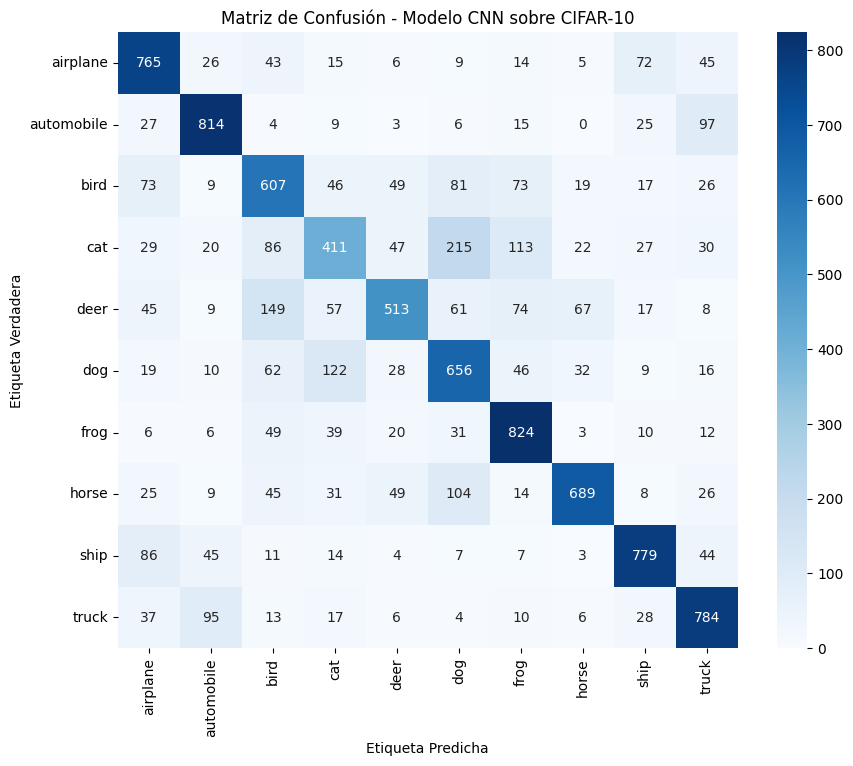

In [23]:
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión - Modelo CNN sobre CIFAR-10')
plt.show()

# GUARDADO DEL MODELO

In [24]:
model.save("modelo_cnn_cifar10.h5")